# **Unsupervised Learning - Sigma**

**Kelompok : SIGMA** <br>
**Anggota:**
- Achmad Gusti Wijaya
- Bintang Sirius
- Eggie Christyandi
- Handi Widiansyah
- Kevin Bagas Arifki Mawuntu
- Oknardo Budi Setiawan Tulung
- Pijar Hatinurani Merdeka

# **Import Library**

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import plotly.express as px

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.0
seaborn version :  0.13.2


In [3]:
# Mengubah parameter default matplotlib

from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

# **Import Dataset**

In [4]:
# load data
df = pd.read_csv('flight.csv')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [6]:
df

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,18375,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,...,0.0,1134,6/9/2013,297,4.000000,4,1,0.000000,12318,22
62984,36041,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,...,0.0,8016,1/3/2014,89,37.000000,60,14,0.000000,106972,43
62985,45690,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,...,0.0,2594,3/3/2014,29,166.000000,166,0,0.000000,0,0
62986,61027,2/6/2013,2/14/2013,Female,4,guangzhou,guangdong,CN,36.0,3/31/2014,...,0.0,3934,2/26/2013,400,12.000000,12,0,0.000000,0,0


# **1. EDA**

In [72]:
# Konversi Datetime
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'])
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'])
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], errors='coerce')
df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].fillna(df['LAST_FLIGHT_DATE'].min())
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'])

In [5]:
# Klasifikasi kolom-kolom
num = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat = df.select_dtypes(include=['object']).columns.tolist()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62985 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          60719 non-null  object        
 6   WORK_PROVINCE      59740 non-null  object        
 7   WORK_COUNTRY       62962 non-null  object        
 8   AGE                62568 non-null  float64       
 9   LOAD_TIME          62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62437 non-null  float64       
 13  SUM_YR_2           62850 non-null  float64       
 14  SEG_KM

- Pada kolom `LOAD_TIME`, `LAST_FLIGHT_DATE`, `FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME` telah dilakukan perubahan tipe kolom dataset menjadi datetime, karena kolom tersebut berisi tanggal

In [59]:
df[num].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [60]:
df[cat].describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62985,60719,59740,62962
unique,2,3234,1165,118
top,Male,guangzhou,guangdong,CN
freq,48134,9386,17509,57748


- Pada kategori numerical dapat dilihat bahwa berdasarkan data statistik tersebut, terdapat beberapa kolom numerik seperti `FLIGHT_COUNT`, `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM`, `LAST_TO_END`, `EXCHANGE_COUNT`, `avg_discount`, `Points_Sum`, dan `Point_NotFlight` yang mungkin berpotensi mengandung outlier. Hal ini dapat dilihat dari perbedaan yang cukup besar antara nilai maksimum dengan nilai kuartil atas (Q3) pada kolom-kolom tersebut.
- Dapat dilihat bahwa pada `gender` didominasi oleh Male dan `Work_City` oleh guangzhou sedangkan `Work_Province` oleh guangdong, dan `Work_Country` oleh CN

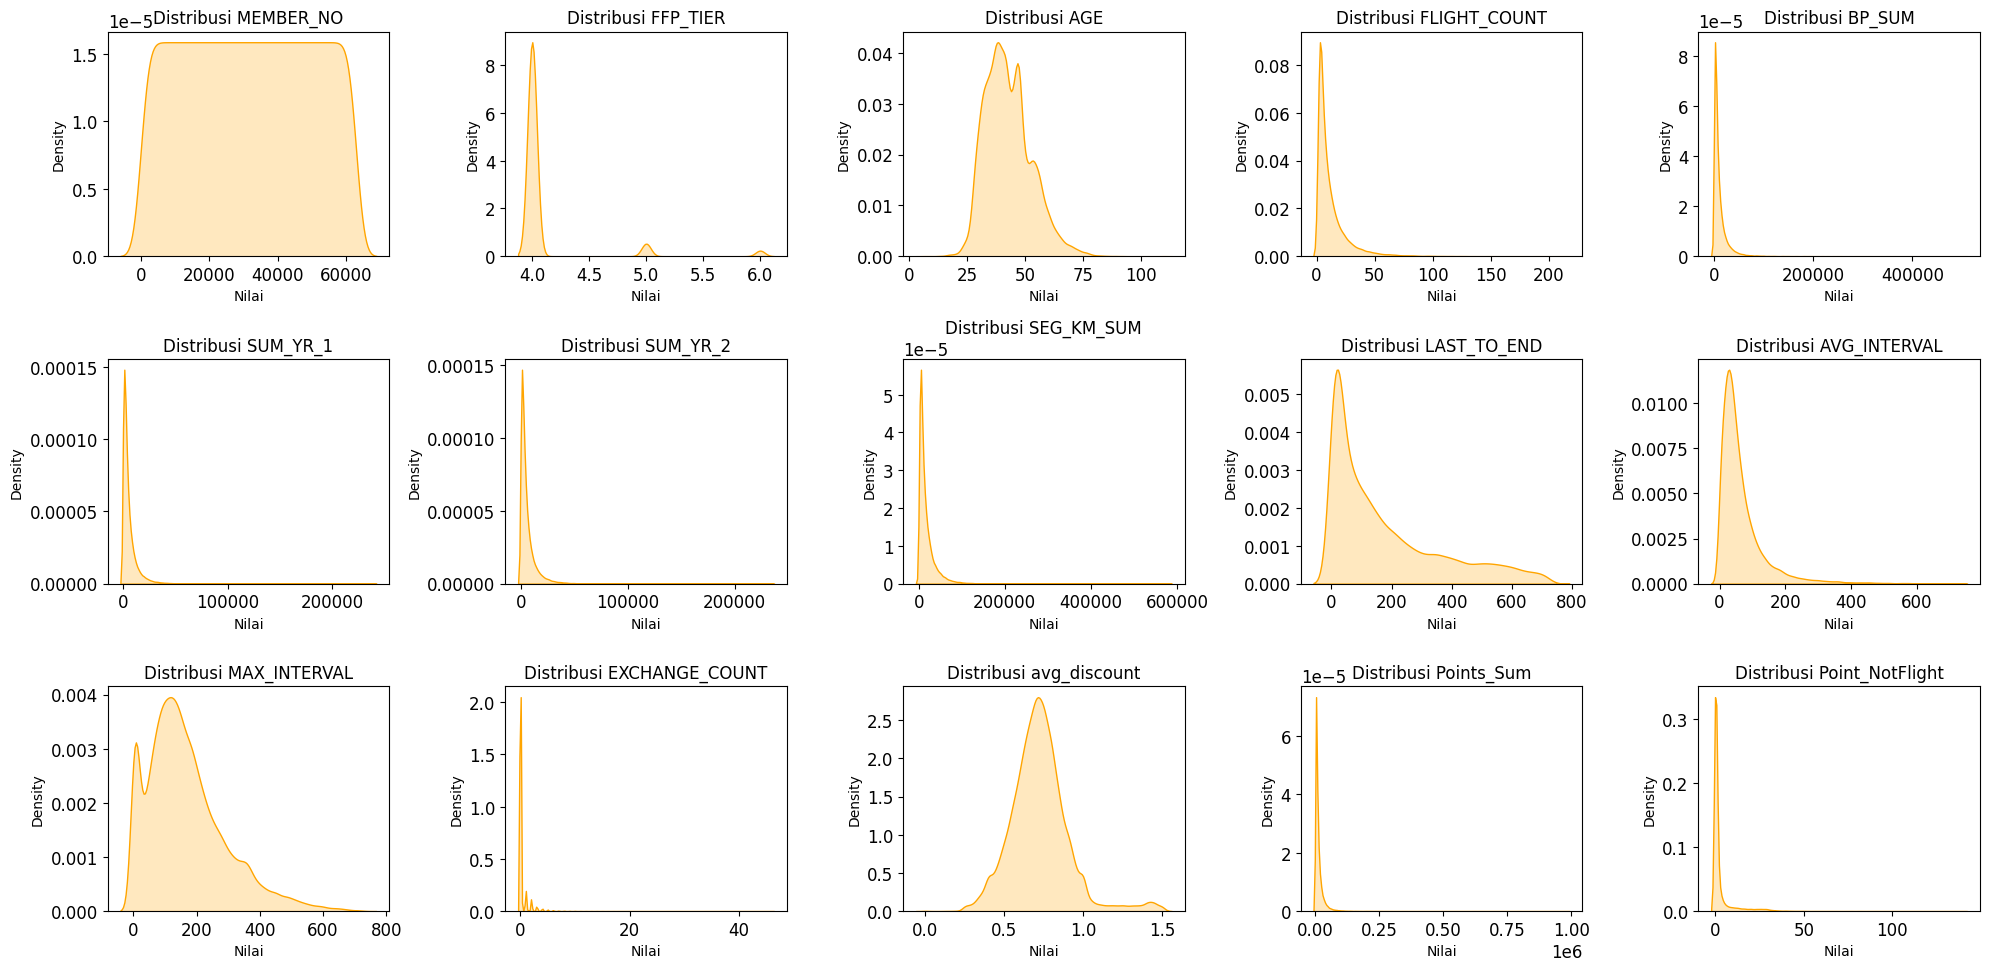

In [61]:
plt.figure(figsize=(20, 10))
for i in range(len(num)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(data=df[num[i]], color='orange', shade=True)
    plt.title(f'Distribusi {num[i]}')
    plt.xlabel('Nilai')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

- Kita bisa melihat bahwa kolom numerik memiliki karakteristik skewness right yang dimana hal tersebut mengindikasikan adanya outlier, sedangkan pada kolom `avg_discount` dan `age` kita bisa melihat bahwa distribusi datanya terlihat seimbang

<Axes: >

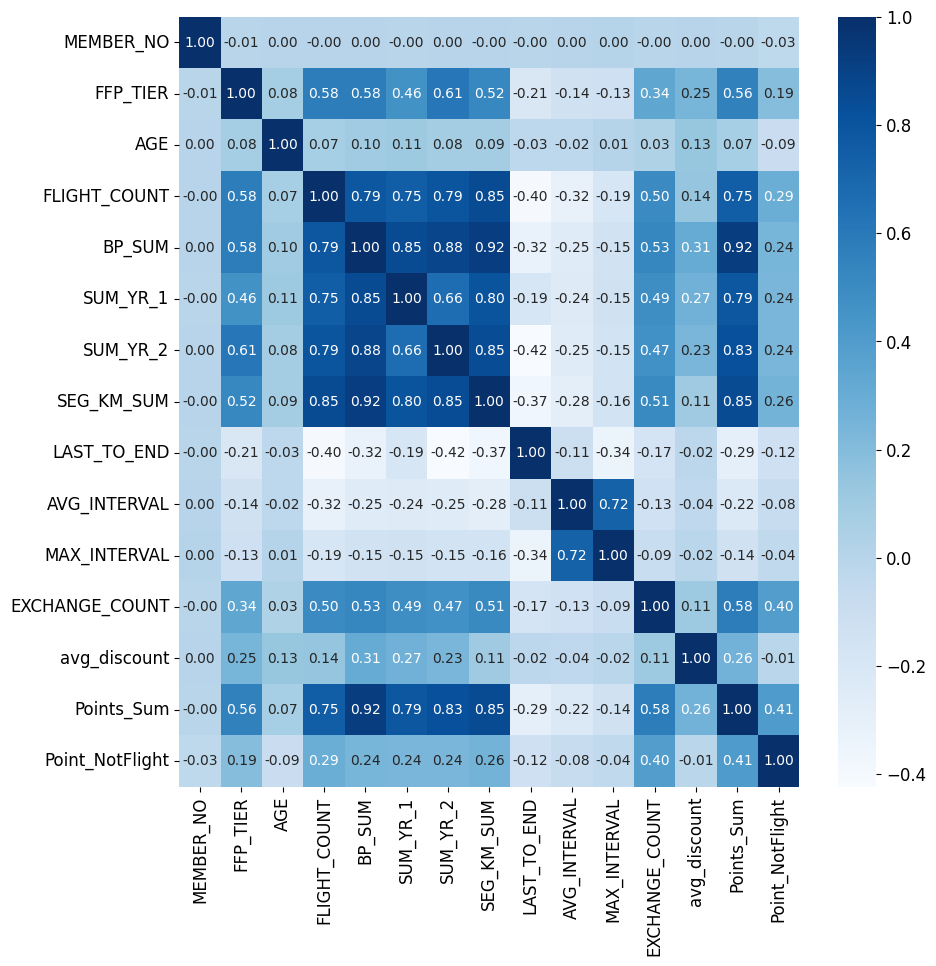

In [6]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[num].corr(), cmap='Blues', annot=True, fmt='.2f')

- Terdapat beberapa korelasi kuat seperti `Points_Sum` dengan `BP_SUM`, `FLIGHT_COUNT` dengan `SEG_KM_SUM`
- Sedangkan beberapa fitur seperti `LAST_TO_END`, `AVG_INTERVAL` dan `MAX_INTERVAL` tidak terlalu banyak berkorelasi dengna kolom lainnya


Akan digunakan model LRFMC :
- **L (Loyalty)**: durasi antara awal keanggotaan hingga waktu data diperoleh.
- **R (Recency)**: durasi antara waktu terakhir pelanggan melakukan penerbangan hingga waktu data diperoleh.
- **F (Frequency)**: total jumlah penerbangan dalam jendela pengamatan.
- **M (Monetary)**: total jarak penerbangan dalam jendela pengamatan.
- **C (Cabin)**: rata-rata diskon yang didapatkan oleh pelanggan dalam jendela pengamatan.

In [85]:
df_xy = df.copy()

In [143]:
# Hitung perbedaan dalam hari antara LOAD_TIME dan FFP_DATE
df_xy['Loyalty'] = (df_xy['LOAD_TIME'] - df_xy['FFP_DATE']).dt.days

# Tambahkan kolom R, F, M, dan C seperti sebelumnya
df_xy['Recency'] = df_xy['LAST_TO_END']
df_xy['Frequency'] = df_xy['FLIGHT_COUNT']
df_xy['Monetary'] = df_xy['SEG_KM_SUM']
df_xy['Cabin'] = df_xy['avg_discount']


In [185]:
num_lrfmc = ['Loyalty','Recency','Frequency','Monetary','Cabin']
df_lrfmc = df_xy[num_lrfmc]
df_lrfmc

,Loyalty,Recency,Frequency,Monetary,Cabin
0,2706,1,210,580717,0.961639
1,2597,7,140,293678,1.252314
2,2615,11,135,283712,1.254676
3,2047,97,23,281336,1.090870
4,1816,5,152,309928,0.970658
...,...,...,...,...,...
62983,1046,297,2,1134,0.000000
62984,1484,89,4,8016,0.000000
62985,2923,29,2,2594,0.000000
62986,418,400,2,3934,0.000000


<Axes: >

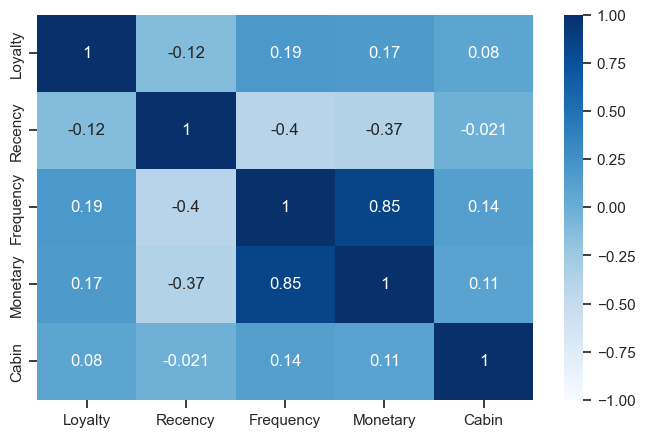

In [186]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_lrfmc.corr(), annot=True, cmap='Blues', vmin=-1.,vmax=1)

- Dapat terlihat bahwa `Monetary` dengan `Frequency` memilik korelasi yang kuat yaitu 0.85

## **2. Data Pre-Processing**


### Dataset Untuk Unsupervised Learning

In [153]:
df_lrfmc

,Loyalty,Recency,Frequency,Monetary,Cabin
0,2706,1,210,580717,0.961639
1,2597,7,140,293678,1.252314
2,2615,11,135,283712,1.254676
3,2047,97,23,281336,1.090870
4,1816,5,152,309928,0.970658
...,...,...,...,...,...
62983,1046,297,2,1134,0.000000
62984,1484,89,4,8016,0.000000
62985,2923,29,2,2594,0.000000
62986,418,400,2,3934,0.000000


### Handle Missing Value and Duplicate Data

In [187]:
df_lrfmc.isna().sum()

Loyalty      0
Recency      0
Frequency    0
Monetary     0
Cabin        0
dtype: int64

In [188]:
# cek baris yang duplikat
print(f'Jumlah row duplicated = {df_lrfmc.duplicated().sum()}')

Jumlah row duplicated = 93


In [189]:
df_lrfmc.drop_duplicates(inplace=True)

### Handle Outliers

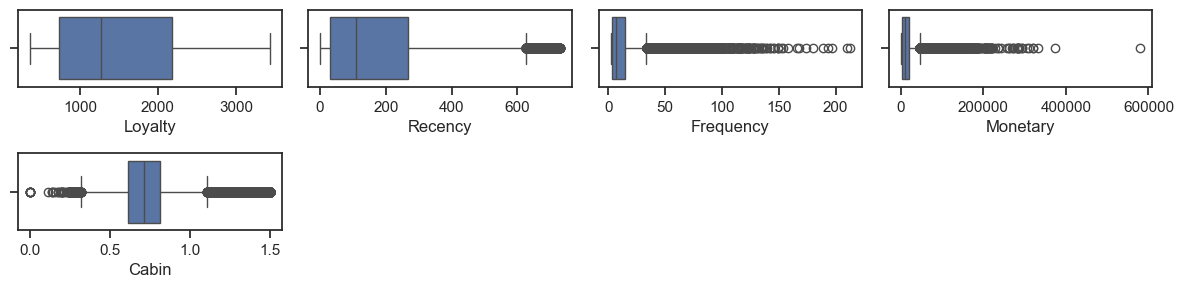

In [190]:
for i in range(0, len(num_lrfmc)):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=df_xy[num_lrfmc[i]])
    plt.tight_layout()

In [191]:
from scipy import stats

z_scores = np.abs(stats.zscore(df_lrfmc[num_lrfmc]))
outliers = z_scores > 3

# Cek keadaan data setelah outlier dihilangkan
cleaned_df_lrfmc = df_lrfmc[~outliers.any(axis=1)]

# Menampilkan hasil
print("Jumlah outlier:")
print(outliers.sum())

print(f'\nJumlah baris sebelum memfilter outlier: {len(df_lrfmc)}')
print(f'Jumlah baris setelah memfilter outlier: {len(cleaned_df_lrfmc)}')

Jumlah outlier:
Loyalty         0
Recency        25
Frequency    1356
Monetary     1274
Cabin        1323
dtype: int64

Jumlah baris sebelum memfilter outlier: 62895
Jumlah baris setelah memfilter outlier: 59818


#### Standarisasi Dan Membuat Dataframe Baru

In [192]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_std = scaler.fit_transform(cleaned_df_lrfmc)
df_standard = pd.DataFrame(data = x_std, columns = num_lrfmc)

In [193]:
df_standard.head()

,Loyalty,Recency,Frequency,Monetary,Cabin
0,1.205553,-0.584486,4.237818,4.348026,3.310711
1,-0.898009,-0.954403,3.527582,4.228881,3.429089
2,-0.474202,-0.976163,4.136356,4.031015,3.454146
3,-0.998009,-0.932643,3.324658,4.015016,3.284779
4,-0.173012,-0.921763,3.324658,3.936435,3.291410


In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(df_xy, num_xy, axis_label):
    
    # Histogram untuk kolom numerik
    plt.figure(figsize=(20, 10))
    for i, col in enumerate(num_xy, 1):
        plt.subplot(2, 3, i)
        sns.histplot(df_xy[col], bins=20, kde=True)
        plt.title(f'Histogram of {col}')
    plt.xlabel(axis_label, fontsize=14)
    plt.show()

# plot_distribution(df_xy, num_xy, "Distribusi Data Sebelum Standarisasi")


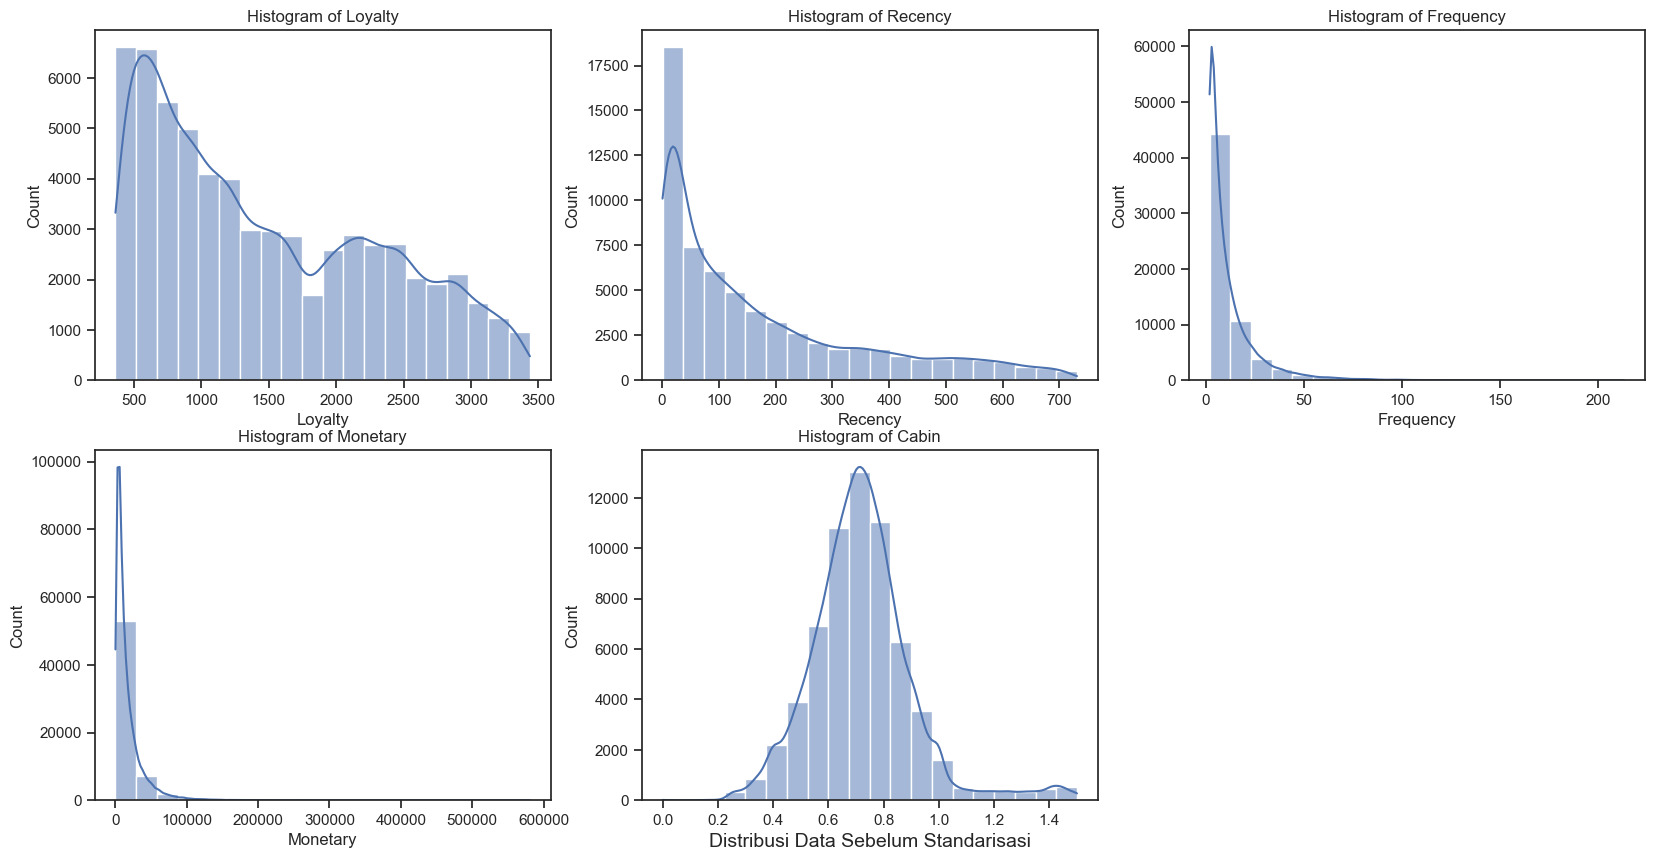

In [195]:
plot_distribution(df_xy, num_lrfmc, "Distribusi Data Sebelum Standarisasi")

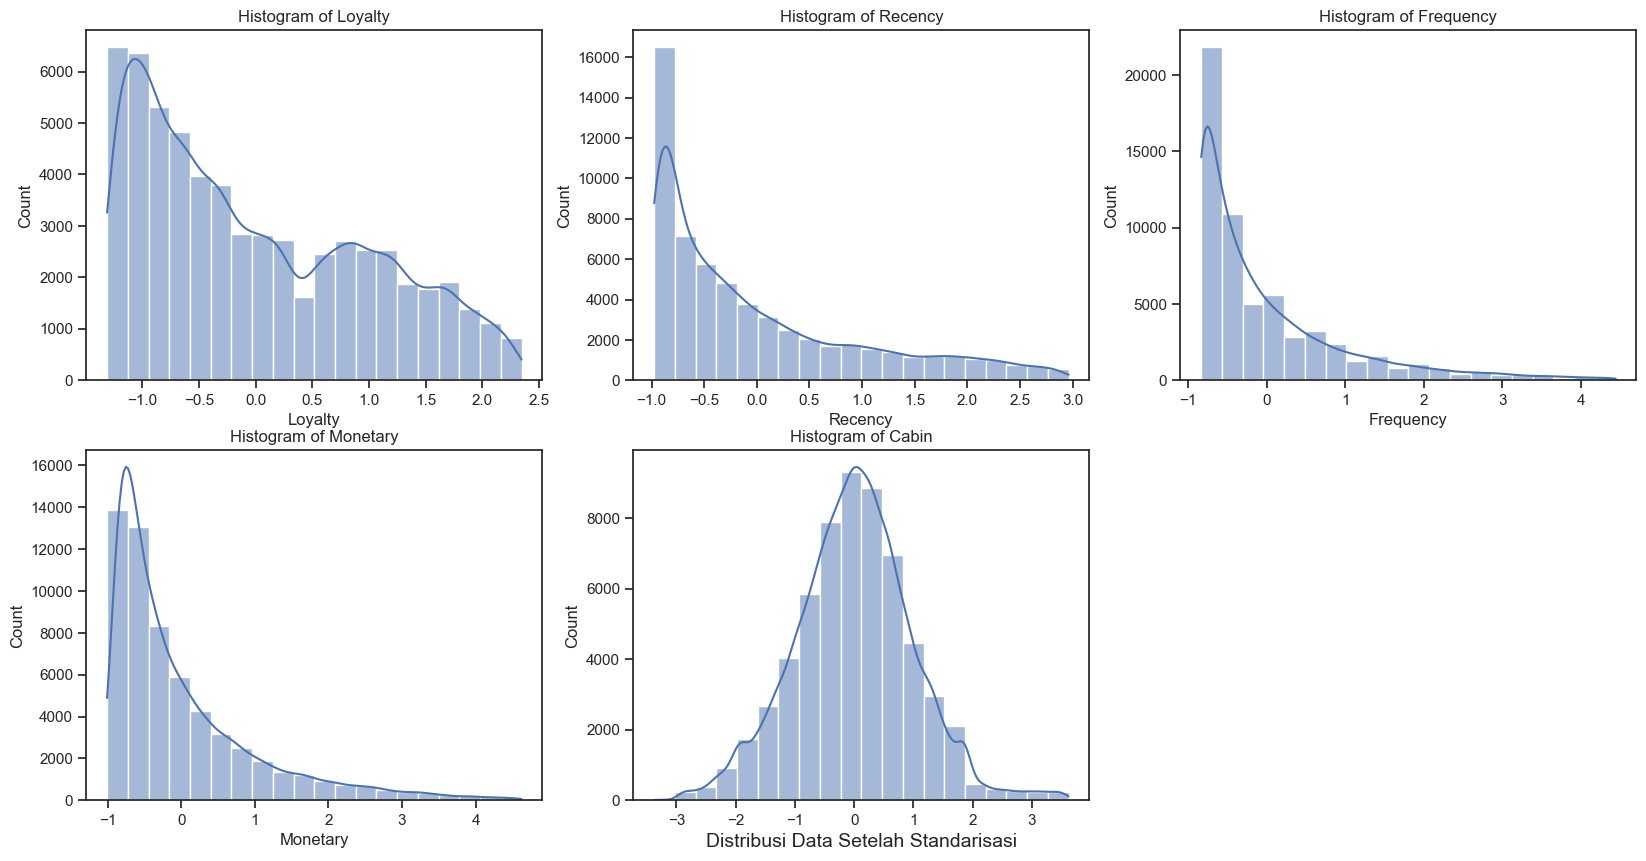

In [196]:
plot_distribution(df_standard, num_lrfmc, "Distribusi Data Setelah Standarisasi")

## **3. K-Means Clustering**


### Elbow Method


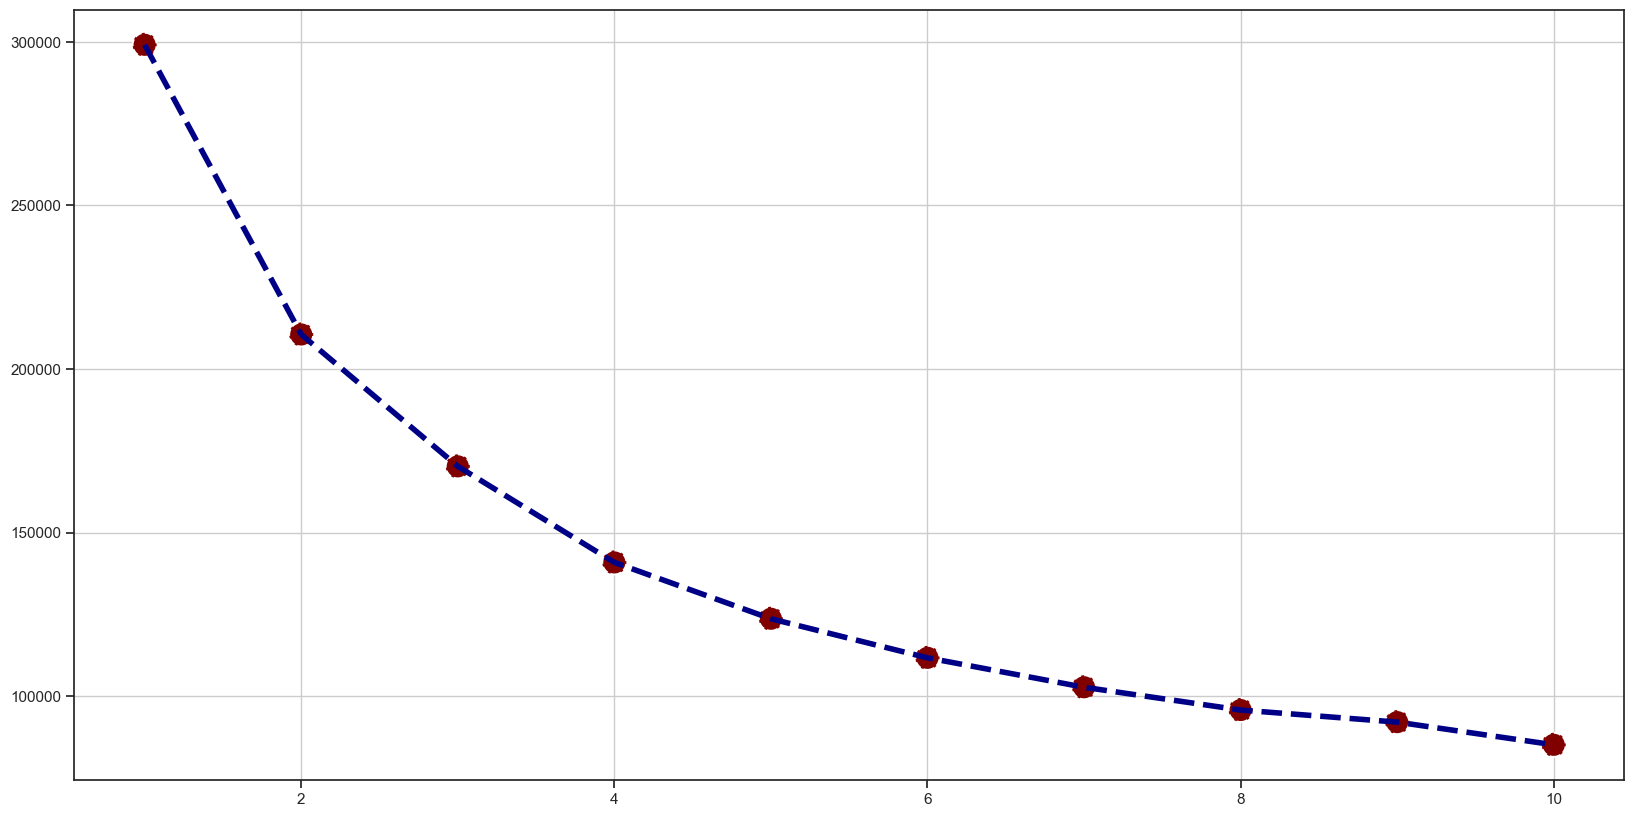

In [198]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_standard)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))
sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth=4, linestyle='dashed')
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000', linestyle='dashed')
plt.grid(True)
plt.show()


- Elbow point diperkirakan pada k = 4

### K-Means & PCA Visualization


In [199]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_standard.values)

KMeans(n_clusters=4, random_state=0)

In [204]:
df_standard['cluster'] = kmeans.labels_
df_standard.head()

,Loyalty,Recency,Frequency,Monetary,Cabin,cluster
0,1.205553,-0.584486,4.237818,4.348026,3.310711,2
1,-0.898009,-0.954403,3.527582,4.228881,3.429089,2
2,-0.474202,-0.976163,4.136356,4.031015,3.454146,2
3,-0.998009,-0.932643,3.324658,4.015016,3.284779,2
4,-0.173012,-0.921763,3.324658,3.936435,3.291410,2


In [205]:
df_pca = cleaned_df_lrfmc.copy() 
df_pca['cluster'] = kmeans.labels_

In [206]:
df_pca.groupby('cluster').agg(['mean', 'median'])

Loyalty             Recency         Frequency         \
                mean  median        mean median       mean median   
cluster                                                             
0        1206.908879  1003.0  483.165944  478.0   3.657916    3.0   
1         880.002270   823.0  108.551129   90.0   7.753631    7.0   
2        1720.787598  1619.5   46.104839   23.0  28.831735   27.0   
3        2448.824025  2408.0  122.514114   99.0   8.150374    7.0   

             Monetary              Cabin            
                 mean   median      mean    median  
cluster                                             
0         5623.788295   4170.0  0.709320  0.717094  
1        11060.560982   9341.0  0.683691  0.687881  
2        41066.385353  38538.5  0.741018  0.728091  
3        11551.713602   9940.0  0.713902  0.711856

In [223]:
## melakukan PCA untuk melihat visualisasi
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df_standard)
pcs = pca.transform(df_standard)

In [222]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = df_standard['cluster']
data_pca.head()

,PC 1,PC 2,cluster
0,5.236269,3.068357,2
1,4.339580,3.948884,2
2,4.684963,3.884265,2
3,4.090081,3.811634,2
4,4.312813,3.294852,2


In [234]:
import matplotlib.pyplot as plt

def plot_clusters(data_pca):
    color_list = ['red', 'blue', 'green', 'orange', 'purple', 'pink']

    plt.figure(figsize=(15, 10))
    for i, cluster in enumerate(data_pca['cluster'].unique()):
        df_cluster = data_pca[data_pca['cluster'] == cluster]
        plt.scatter(df_cluster['PC 1'], df_cluster['PC 2'], c=color_list[i], s=5, label=f'Cluster {cluster}')
        # Centroid positions
        plt.scatter(df_cluster['PC 1'].mean(), df_cluster['PC 2'].mean(), c=color_list[i], marker='X', edgecolor='k', s=250, zorder=10)

    plt.legend()
    plt.title('PCA Scatter Plot with Clusters')
    plt.xlabel('PC 1', fontsize=14)
    plt.ylabel('PC 2', fontsize=14)
    plt.show()



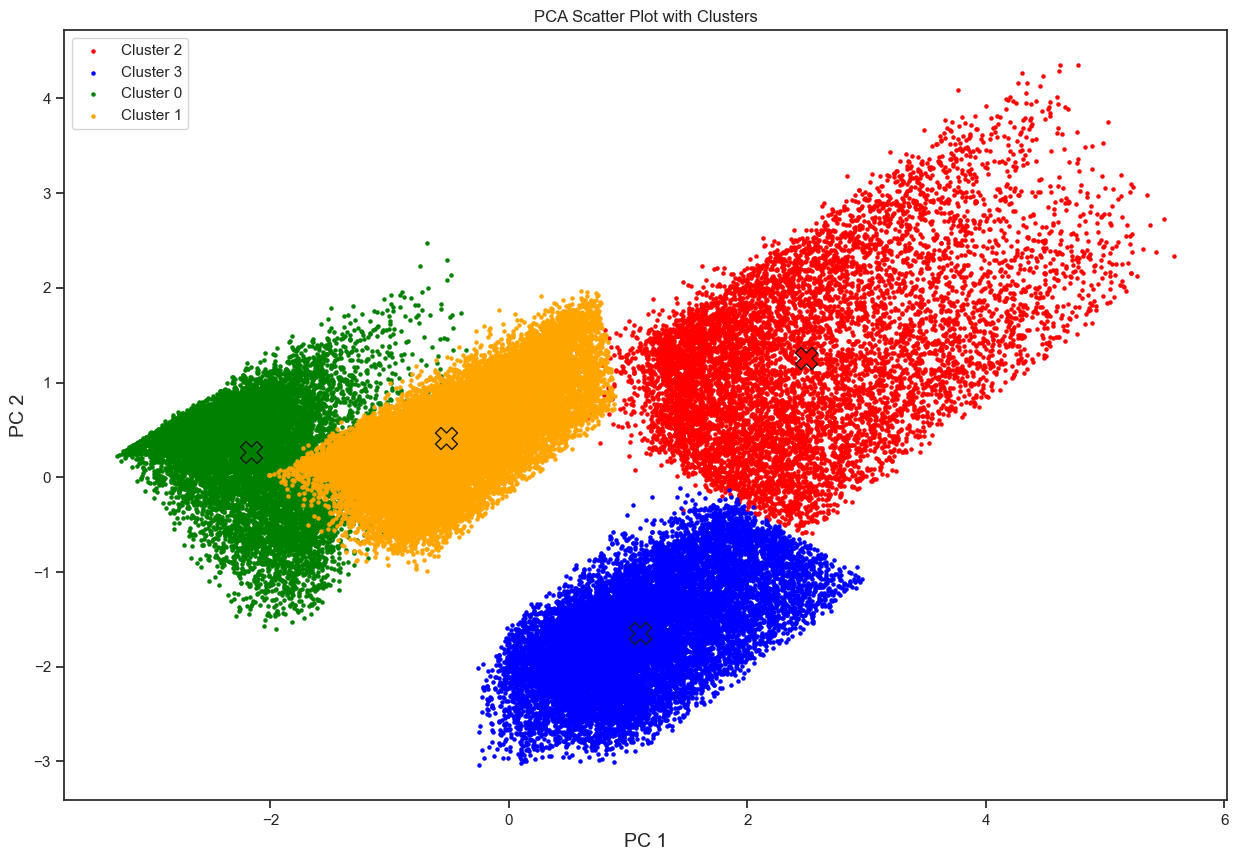

In [236]:
plot_clusters(data_pca)

## **4. Interpretasi**


In [230]:
df_pca.groupby('cluster').agg(['mean', 'median'])

Loyalty             Recency         Frequency         \
                mean  median        mean median       mean median   
cluster                                                             
0        1206.908879  1003.0  483.165944  478.0   3.657916    3.0   
1         880.002270   823.0  108.551129   90.0   7.753631    7.0   
2        1720.787598  1619.5   46.104839   23.0  28.831735   27.0   
3        2448.824025  2408.0  122.514114   99.0   8.150374    7.0   

             Monetary              Cabin            
                 mean   median      mean    median  
cluster                                             
0         5623.788295   4170.0  0.709320  0.717094  
1        11060.560982   9341.0  0.683691  0.687881  
2        41066.385353  38538.5  0.741018  0.728091  
3        11551.713602   9940.0  0.713902  0.711856

Dari tabel di atas, terdapat empat cluster pelanggan yang telah diidentifikasi berdasarkan model LRFMC. Berikut adalah beberapa kesimpulan, wawasan bisnis, dan rekomendasi berdasarkan analisis tersebut:

1. **(Cluster 0)**:
   - **Loyalty**: Rata-rata durasi keanggotaan adalah sekitar 1206 hari dengan median 1003 hari.
   - **Recency**: Rata-rata pelanggan terakhir melakukan penerbangan sekitar 483 hari yang lalu dengan median 478 hari yang lalu.
   - **Frequency**: Rata-rata frekuensi penerbangan adalah sekitar 3.66 dengan median 3.
   - **Monetary**: Rata-rata total jarak penerbangan adalah sekitar 5623.79 dengan median 4170.
   - **Cabin**: Rata-rata diskon yang didapatkan adalah sekitar 0.71 dengan median 0.72.

   **Insight**: Pelanggan dalam cluster ini memiliki durasi keanggotaan yang cukup lama dan telah melakukan beberapa penerbangan dengan total jarak yang signifikan. Namun, frekuensi penerbangan mereka cenderung rendah.

   **Rekomendasi**: Mengembangkan program loyalitas yang dapat mendorong pelanggan dalam cluster ini untuk melakukan lebih banyak penerbangan, seperti penawaran diskon khusus untuk penerbangan berikutnya atau program reward untuk setiap penerbangan tambahan.

2. **(Cluster 1)**:
   - **Loyalty**: Rata-rata durasi keanggotaan adalah sekitar 880 hari dengan median 823 hari.
   - **Recency**: Rata-rata pelanggan terakhir melakukan penerbangan sekitar 108 hari yang lalu dengan median 90 hari yang lalu.
   - **Frequency**: Rata-rata frekuensi penerbangan adalah sekitar 7.75 dengan median 7.
   - **Monetary**: Rata-rata total jarak penerbangan adalah sekitar 11060.56 dengan median 9341.
   - **Cabin**: Rata-rata diskon yang didapatkan adalah sekitar 0.68 dengan median 0.69.

   **Insight**: Pelanggan dalam cluster ini memiliki durasi keanggotaan yang cukup lama dan frekuensi penerbangan yang relatif tinggi. Mereka juga cenderung mendapatkan diskon yang lebih rendah.

   **Rekomendasi**: Menawarkan program reward atau diskon khusus yang dapat meningkatkan loyalitas dan frekuensi penerbangan pelanggan dalam cluster ini.

3. **(Cluster 2)**:
   - **Loyalty**: Rata-rata durasi keanggotaan adalah sekitar 1720 hari dengan median 1619.5 hari.
   - **Recency**: Rata-rata pelanggan terakhir melakukan penerbangan sekitar 46 hari yang lalu dengan median 23 hari yang lalu.
   - **Frequency**: Rata-rata frekuensi penerbangan adalah sekitar 28.83 dengan median 27.
   - **Monetary**: Rata-rata total jarak penerbangan adalah sekitar 41066.39 dengan median 38538.5.
   - **Cabin**: Rata-rata diskon yang didapatkan adalah sekitar 0.74 dengan median 0.73.

   **Insight**: Pelanggan dalam cluster ini memiliki durasi keanggotaan yang sangat lama, frekuensi penerbangan yang tinggi, dan total jarak penerbangan yang besar. Mereka juga cenderung mendapatkan diskon yang tinggi.

   **Rekomendasi**: Memperkuat hubungan dengan pelanggan dalam cluster ini melalui layanan pelanggan yang unggul dan penawaran eksklusif yang sesuai dengan kebutuhan dan preferensi mereka.

4. **(Cluster 3)**:
   - **Loyalty**: Rata-rata durasi keanggotaan adalah sekitar 2448.82 hari dengan median 2408 hari.
   - **Recency**: Rata-rata pelanggan terakhir melakukan penerbangan sekitar 122 hari yang lalu dengan median 99 hari yang lalu.
   - **Frequency**: Rata-rata frekuensi penerbangan adalah sekitar 8.15 dengan median 7.
   - **Monetary**: Rata-rata total jarak penerbangan adalah sekitar 11551.71 dengan median 9940.
   - **Cabin**: Rata-rata diskon yang didapatkan adalah sekitar 0.71 dengan median 0.71.

   **Insight**: Pelanggan dalam cluster ini memiliki durasi keanggotaan yang lama, frekuensi penerbangan yang cukup tinggi, dan total jarak penerbangan yang signifikan. Mereka mendapatkan diskon yang cenderung stabil.

   **Rekomendasi**: Menjaga kualitas layanan dan konsistensi diskon untuk mempertahankan loyalitas pelanggan dalam cluster ini.

Dengan menganalisis karakteristik setiap cluster, bisnis dapat mengidentifikasi strategi yang lebih efektif untuk meningkatkan loyalitas pelanggan, meningkatkan frekuensi penerbangan, dan meningkatkan nilai Moneter dari pelanggan.

## *APPENDIX*
